# Explicacion variables

Date (object)

Representa la fecha en la que se registraron los datos, en formato YYYY-MM-DD (por ejemplo, "2008-12-01"). Es una variable categórica temporal que sirve como identificador o referencia temporal.


Location (object)

Indica la ubicación geográfica donde se tomaron las mediciones, como una ciudad o estación meteorológica (por ejemplo, "Albury"). Es una variable categórica que identifica el lugar.


MinTemp (float64)

Temperatura mínima registrada en el día, en grados Celsius.


MaxTemp (float64)

Temperatura máxima registrada en el día, en grados Celsius.


Rainfall (float64)

Cantidad de precipitación (lluvia) en milímetros registrada en el día.


Evaporation (float64)

Cantidad de evaporación registrada en milímetros, probablemente medida con un evaporímetro.


Sunshine (float64)

Número de horas de sol registradas en el día.


WindGustDir (object)

Dirección del viento más fuerte (ráfaga) del día, en términos de puntos cardinales (por ejemplo, "W" para oeste). 


WindGustSpeed (float64)

Velocidad en kilómetros por hora de la ráfaga de viento más fuerte del día.


WindDir9am (object)

Dirección del viento a las 9 de la mañana, en puntos cardinales (por ejemplo, "WNW" para oeste-noroeste).


WindDir3pm (object)

Dirección del viento a las 3 de la tarde, en puntos cardinales.

WindSpeed9am (float64)

Velocidad del viento en kilómetros por hora a las 9 de la mañana.


WindSpeed3pm (float64)

Velocidad del viento en kilómetros por hora a las 3 de la tarde.


Humidity9am (float64)

Humedad relativa en porcentaje a las 9 de la mañana. 


Humidity3pm (float64)

Humedad relativa en porcentaje a las 3 de la tarde.


Pressure9am (float64)

Presión atmosférica en hectopascales (hPa) a las 9 de la mañana.


Pressure3pm (float64)

Presión atmosférica en hectopascales (hPa) a las 3 de la tarde.


Cloud9am (float64)

Cantidad de nubosidad (en oktas, de 0 a 8) a las 9 de la mañana.


Cloud3pm (float64)

Cantidad de nubosidad a las 3 de la tarde.


Temp9am (float64)

Temperatura en grados Celsius a las 9 de la mañana.


Temp3pm (float64)

Temperatura en grados Celsius a las 3 de la tarde.


RainToday (object)

Indica si llovió o no el día actual, como "Yes" o "No".


RainTomorrow (object)

Predice si lloverá o no al día siguiente, como "Yes" o "No".

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.impute import KNNImputer

In [73]:
df = pd.read_csv('weatherAUS.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [75]:
pd.set_option('display.max_columns', None)

In [76]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Dividir datos de entrenamiento y testeo

In [77]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116368, 22), (29092, 22), (116368,), (29092,))

In [79]:
df.shape

(145460, 23)

# Tratamiento de nulos

In [80]:
# nulos por columna
X_train.isna().sum()

Date                 0
Location             0
MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustDir       8250
WindGustSpeed     8202
WindDir9am        8429
WindDir3pm        3397
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
RainToday         2604
dtype: int64

In [81]:
# porcentaje de nulos por columna
porcentajes_nulos = (X_train.isna().sum() / len(df)) * 100

# Mostrar los resultados
print(porcentajes_nulos)

Date              0.000000
Location          0.000000
MinTemp           0.809845
MaxTemp           0.686099
Rainfall          1.790183
Evaporation      34.599890
Sunshine         38.458683
WindGustDir       5.671662
WindGustSpeed     5.638664
WindDir9am        5.794720
WindDir3pm        2.335350
WindSpeed9am      0.967964
WindSpeed3pm      1.689124
Humidity9am       1.455383
Humidity3pm       2.485907
Pressure9am       8.291627
Pressure3pm       8.278565
Cloud9am         30.769284
Cloud3pm         32.688024
Temp9am           0.965901
Temp3pm           1.991613
RainToday         1.790183
dtype: float64


In [82]:
nan_por_fila = X_train.isna().sum(axis=1)

# Filtrar filas con más de un NaN
filas_con_mas_de_un_nan = (nan_por_fila > 1).sum()

print(f"Número de filas en X_train con más de un NaN en las columnas: {filas_con_mas_de_un_nan}")

# Filtrar filas con más de dos NaN
filas_con_mas_de_un_nan = (nan_por_fila > 2).sum()

print(f"Número de filas en X_train con más de dos NaN en las columnas: {filas_con_mas_de_un_nan}")

# Filtrar filas con más de tres NaN
filas_con_mas_de_un_nan = (nan_por_fila > 3).sum()

print(f"Número de filas en X_train con más de tres NaN en las columnas: {filas_con_mas_de_un_nan}")

Número de filas en X_train con más de un NaN en las columnas: 62279
Número de filas en X_train con más de dos NaN en las columnas: 47775
Número de filas en X_train con más de tres NaN en las columnas: 40006


## Imputacion con KNN

In [ ]:
## Definir las columnas a escalar
#cols_a_escalar = ['Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

# Definir las columnas a escalar
cols_a_escalar = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]


# --- Escalar X_train ---
scaler = StandardScaler()

# Identificar filas sin NaN en las columnas a escalar
filas_sin_nan_train = ~X_train[cols_a_escalar].isna().any(axis=1)
df_sin_nan_train = X_train.loc[filas_sin_nan_train, cols_a_escalar]

# Escalar las filas sin NaN
df_sin_nan_escalado_array = scaler.fit_transform(df_sin_nan_train)

# Crear un DataFrame con los valores escalados, manteniendo el índice original
df_sin_nan_escalado = pd.DataFrame(df_sin_nan_escalado_array, columns=cols_a_escalar, index=df_sin_nan_train.index)

# Reemplazar las columnas originales en X_train con los valores escalados (manteniendo NaN donde corresponde)
X_train.loc[filas_sin_nan_train, cols_a_escalar] = df_sin_nan_escalado

# --- Escalar X_test ---
# Identificar filas sin NaN en las columnas a escalar
filas_sin_nan_test = ~X_test[cols_a_escalar].isna().any(axis=1)
df_sin_nan_test = X_test.loc[filas_sin_nan_test, cols_a_escalar]

# Escalar las filas sin NaN usando el mismo scaler ajustado con X_train
df_sin_nan_escalado_array = scaler.transform(df_sin_nan_test)

# Crear un DataFrame con los valores escalados, manteniendo el índice original
df_sin_nan_escalado = pd.DataFrame(df_sin_nan_escalado_array, columns=cols_a_escalar, index=df_sin_nan_test.index)

# Reemplazar las columnas originales en X_test con los valores escalados (manteniendo NaN donde corresponde)
X_test.loc[filas_sin_nan_test, cols_a_escalar] = df_sin_nan_escalado

In [84]:
# Imputamos las COORDENADAS con KNN
imputer = KNNImputer(n_neighbors=5)

# Creamos copia de X_train y X_test
X_train_imputado = X_train.copy()
X_test_imputado = X_test.copy()

# Imputar en X_train
X_train_imputado[cols_a_escalar] = imputer.fit_transform(X_train_imputado[cols_a_escalar])

# Imputar en X_test (usando el mismo imputer ajustado en X_train)
X_test_imputado[cols_a_escalar] = imputer.transform(X_test_imputado[cols_a_escalar])

# Verificar que no queden NaN
print("Nulos en X_train imputado:", X_train_imputado[cols_a_escalar].isna().sum())
print("Nulos en X_test imputado:", X_test_imputado[cols_a_escalar].isna().sum())

Nulos en X_train imputado: MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64
Nulos en X_test imputado: MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


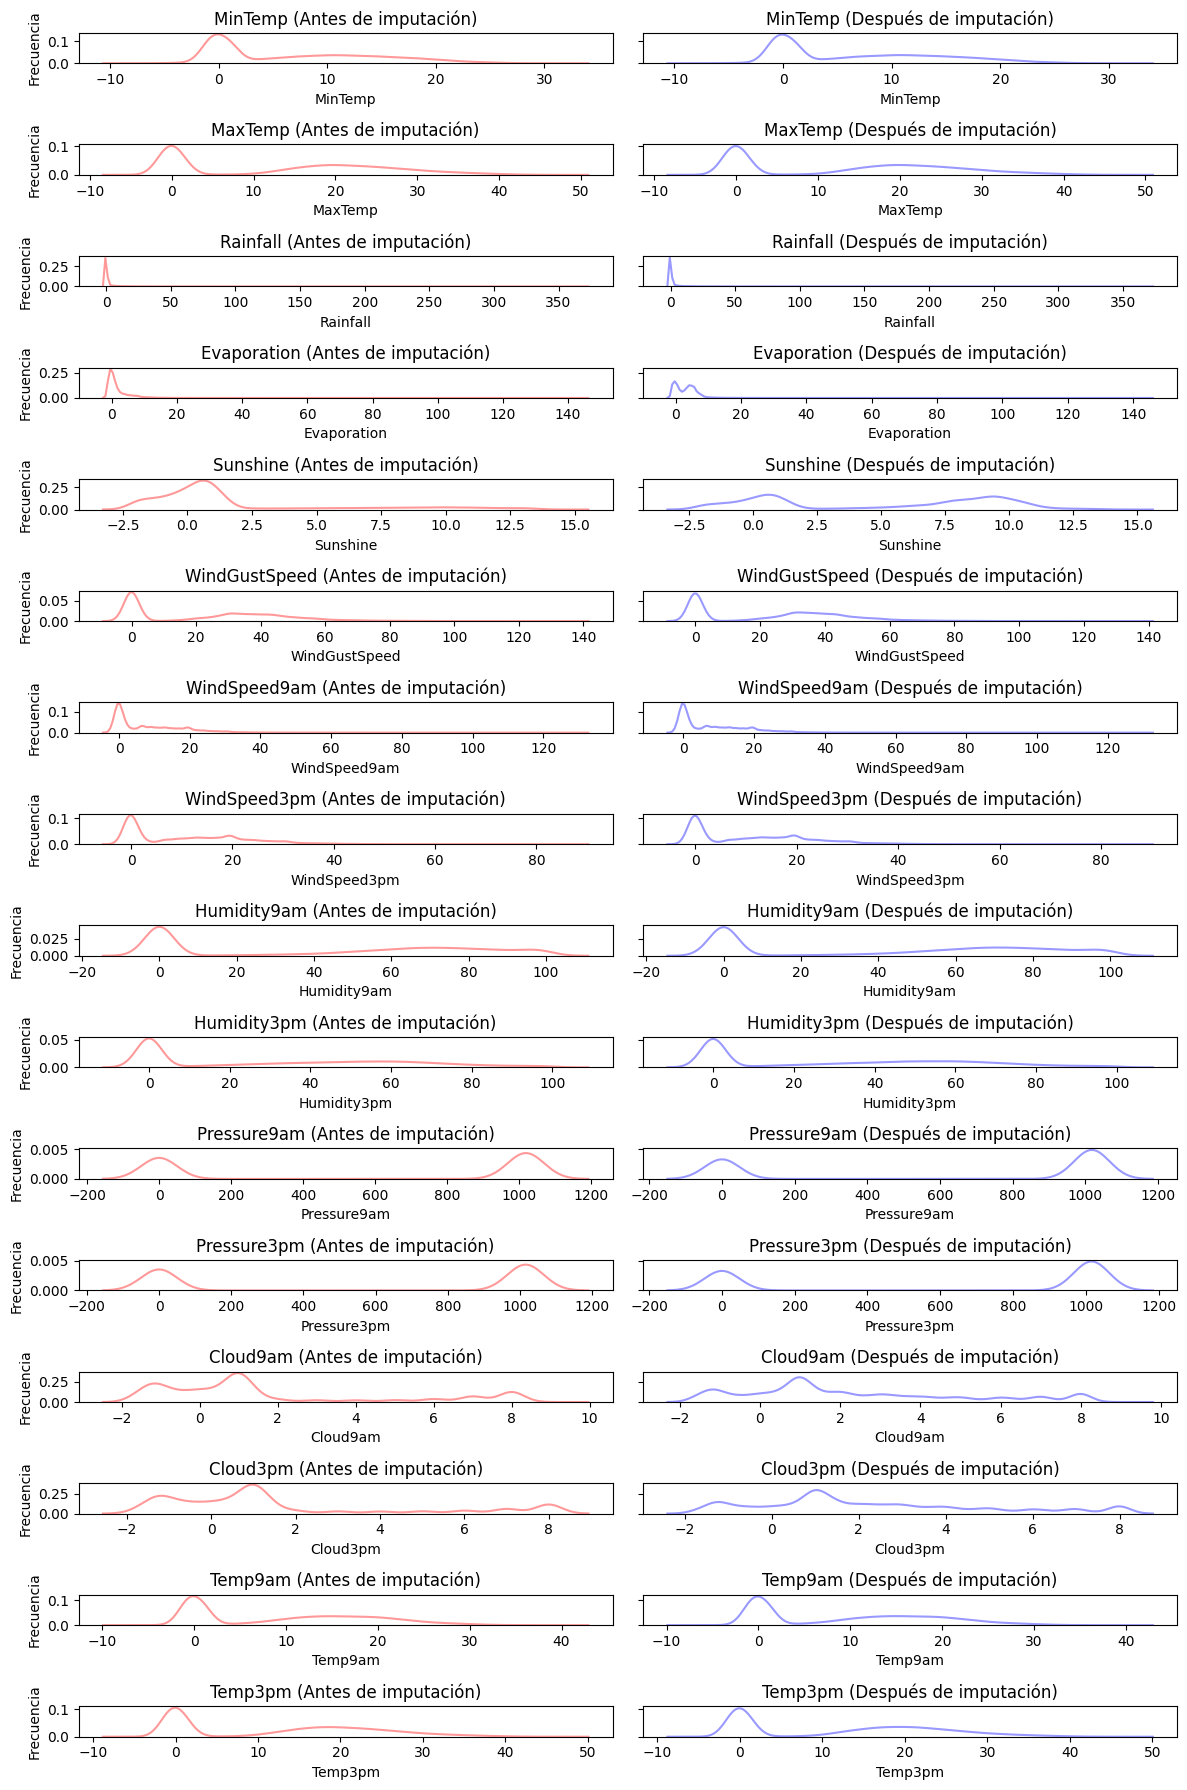

In [85]:
# Graficos comparativos antes y después de la imputación

fig, axes = plt.subplots(nrows=len(cols_a_escalar), ncols=2, figsize=(12, 18), sharey='row')

for i, col in enumerate(cols_a_escalar):
    data_antes = X_train[col].dropna()
    sns.kdeplot(data=data_antes,  color='red', alpha=0.4, ax=axes[i][0])
    axes[i][0].set_title(f'{col} (Antes de imputación)')
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel('Frecuencia')

    # Después de la imputación
    data_despues = X_train_imputado[col]
    sns.kdeplot(data=data_despues,  color='blue', alpha=0.4, ax=axes[i][1])
    axes[i][1].set_title(f'{col} (Después de imputación)')
    axes[i][1].set_xlabel(col)
    axes[i][1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Consigna 1 - Creacion de variable regiones

Se  solicita  en  primera  instancia  crear  clusters  con  las  ciudades del Dataset para 
catalogarlas en otra categoría: regiones. La cantidad de regiones será definida por 
cada  grupo,  observarlas  en  un  gráfico  de  latitud  y  longitud  para  acompañar  la 
decisión.

In [86]:
X_train_imputado["Location"].unique()

array(['Albany', 'Katherine', 'MelbourneAirport', 'Williamtown',
       'Adelaide', 'Nuriootpa', 'Albury', 'Mildura', 'Launceston',
       'Townsville', 'Cobar', 'Uluru', 'Brisbane', 'Darwin', 'Melbourne',
       'Portland', 'Cairns', 'Sydney', 'Sale', 'Dartmoor', 'AliceSprings',
       'Woomera', 'MountGinini', 'Ballarat', 'NorahHead', 'Tuggeranong',
       'PearceRAAF', 'MountGambier', 'Perth', 'Walpole', 'WaggaWagga',
       'Newcastle', 'Hobart', 'SydneyAirport', 'BadgerysCreek', 'Bendigo',
       'SalmonGums', 'Richmond', 'GoldCoast', 'Moree', 'CoffsHarbour',
       'Canberra', 'Watsonia', 'Witchcliffe', 'NorfolkIsland',
       'PerthAirport', 'Penrith', 'Nhil', 'Wollongong'], dtype=object)

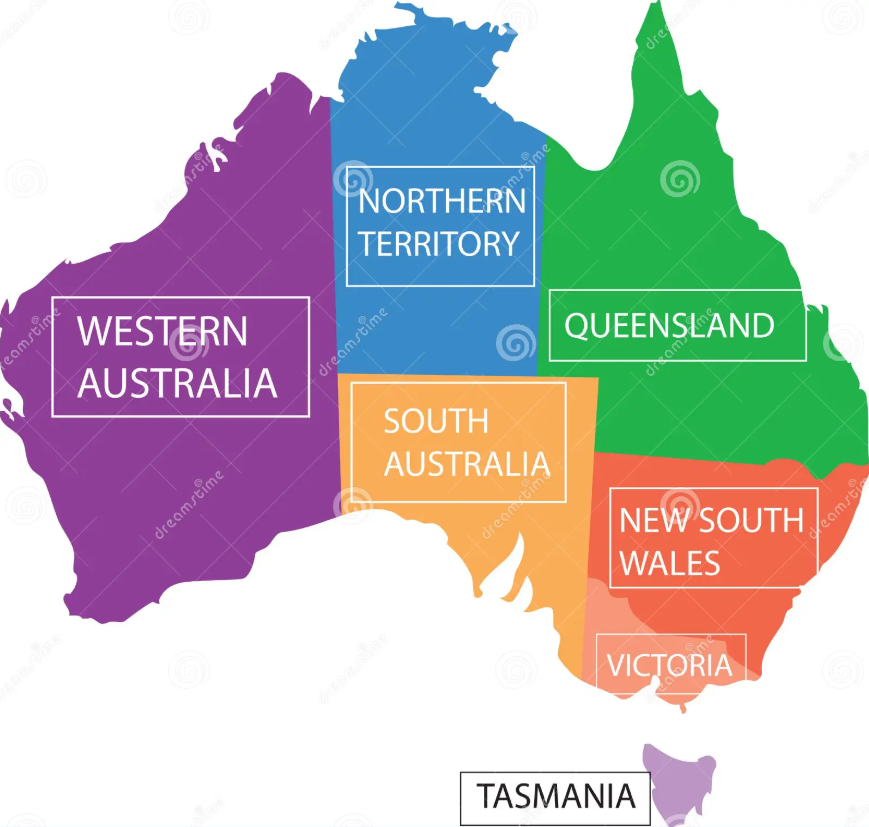

### Intento 1 - Agrupando por provincia

In [87]:
# https://www.kaggle.com/datasets/maryamalizadeh/worldcities-australia?resource=download
df_aus = pd.read_csv('au.csv')

In [88]:
df_aus.shape

(1035, 9)

In [89]:
df_aus.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


In [111]:
# Diccionario para normalizar nombres de ubicaciones
normalizar_ubicaciones = {
    'MelbourneAirport': 'Melbourne',
    'SydneyAirport': 'Sydney',
    'PerthAirport': 'Perth',
    'PearceRAAF': 'Perth',
    'WaggaWagga': 'Wagga Wagga',  # Corregir formato
    'CoffsHarbour': 'Coffs Harbour',  # Corregir formato
    'MountGambier': 'Mount Gambier',  # Corregir formato
    'Tuggeranong': 'Canberra',  # Suburbio de Canberra
    'BadgerysCreek': 'Sydney',  # Suburbio de Sydney
    'NorahHead': 'Newcastle',  # Cerca de Newcastle
    'Penrith': 'Sydney',  # Suburbio de Sydney
    'Richmond': 'Sydney',  # Suburbio de Sydney
    'GoldCoast': 'Gold Coast',  # Corregir formato
    'NorfolkIsland': 'Norfolk Island',  # Isla externa
    'MountGinini': 'Canberra',  # Cerca de Canberra
    'Nhile': 'Nhill',  # Corregir error tipográfico
    'Watsonia': 'Melbourne',  # Suburbio de Melbourne
    'Williamtown' : 'Williamstown',  # error tipografico
}

# Aplicar normalización a la columna Location
X_train_imputado['Location_normalized'] = X_train_imputado['Location'].replace(normalizar_ubicaciones)

# Crear diccionario de mapeo de ciudades a provincias desde df_aus
mapeo_ciudades = dict(zip(df_aus['city'], df_aus['admin_name']))

# Mapear admin_name usando la columna normalizada
X_train_imputado['provincia'] = X_train_imputado['Location_normalized'].map(mapeo_ciudades)
# X_test
X_test_imputado["Location_normalized"] = X_test_imputado['Location'].replace(normalizar_ubicaciones)
X_test_imputado["provincia"] = X_test_imputado['Location_normalized'].map(mapeo_ciudades)

# Eliminar la columna temporal Location_normalized
X_train_imputado = X_train_imputado.drop(columns=['Location_normalized'])
X_test_imputado = X_test_imputado.drop(columns=['Location_normalized'])

C:\Users\maxir\AppData\Local\Temp\ipykernel_13336\3128256631.py:24: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_train_imputado['Location_normalized'] = X_train_imputado['Location'].replace(normalizar_ubicaciones)
C:\Users\maxir\AppData\Local\Temp\ipykernel_13336\3128256631.py:32: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_test_imputado["Location_normalized"] = X_test_imputado['Location'].replace(normalizar_ubicaciones)


In [112]:
print(X_train_imputado['provincia'].isna().sum())

19314


In [113]:
X_train_imputado.loc[X_train_imputado['Location'] == 'NorfolkIsland', 'provincia'] = 'Norfolk Island Territory'

X_train_imputado.loc[X_train_imputado['Location'] == 'Nhil', 'provincia'] = 'Victoria'
X_train_imputado.loc[X_train_imputado['Location'] == 'Dartmoor', 'provincia'] = 'Victoria'
X_train_imputado.loc[X_train_imputado['Location'] == 'Woomera', 'provincia'] = 'South Australia'
X_train_imputado.loc[X_train_imputado['Location'] == 'Witchcliffe', 'provincia'] = 'Western Australia'
X_train_imputado.loc[X_train_imputado['Location'] == 'SalmonGums', 'provincia'] = 'Western Australia'
X_train_imputado.loc[X_train_imputado['Location'] == 'Walpole', 'provincia'] = 'Western Australia'
X_train_imputado.loc[X_train_imputado['Location'] == 'AliceSprings', 'provincia'] = 'Northern Territory'
X_train_imputado.loc[X_train_imputado['Location'] == 'Uluru', 'provincia'] = 'Northern Territory'

In [114]:
print(X_train_imputado['provincia'].isna().sum())

0


In [115]:
# Listar Location y admin_name, eliminando duplicados
lista_ubicaciones = X_train_imputado[['Location', 'provincia']].drop_duplicates()

# Mostrar la lista
print(lista_ubicaciones)

                Location                     provincia
111548            Albany             Western Australia
142528         Katherine            Northern Territory
65304   MelbourneAirport                      Victoria
40651        Williamtown               South Australia
97487           Adelaide               South Australia
103132         Nuriootpa               South Australia
2551              Albury               New South Wales
71662            Mildura                      Victoria
133371        Launceston                      Tasmania
95882         Townsville                    Queensland
8397               Cobar               New South Wales
144564             Uluru            Northern Territory
85224           Brisbane                    Queensland
139941            Darwin            Northern Territory
69818          Melbourne                      Victoria
77476           Portland                      Victoria
87978             Cairns                    Queensland
31290     

### Intentar obtener latitud y longitud

In [116]:
# Diccionario para normalizar nombres de ubicaciones
normalizar_ubicaciones = {
    'MelbourneAirport': 'Melbourne',
    'SydneyAirport': 'Sydney',
    'PerthAirport': 'Perth',
    'PearceRAAF': 'Perth',
    'WaggaWagga': 'Wagga Wagga',  # Corregir formato
    'CoffsHarbour': 'Coffs Harbour',  # Corregir formato
    'MountGambier': 'Mount Gambier',  # Corregir formato
    'Tuggeranong': 'Canberra',  # Suburbio de Canberra
    'BadgerysCreek': 'Sydney',  # Suburbio de Sydney
    'NorahHead': 'Newcastle',  # Cerca de Newcastle
    'Penrith': 'Sydney',  # Suburbio de Sydney
    'Richmond': 'Sydney',  # Suburbio de Sydney
    'GoldCoast': 'Gold Coast',  # Corregir formato
    'NorfolkIsland': 'Norfolk Island',  # Isla externa
    'MountGinini': 'Canberra',  # Cerca de Canberra
    'Nhile': 'Nhill',  # Corregir error tipográfico
    'Watsonia': 'Melbourne',  # Suburbio de Melbourne
    'Williamtown' : 'Williamstown',  # error tipografico
}

# Aplicar normalización a la columna Location
X_train_imputado['Location_normalized'] = X_train_imputado['Location'].replace(normalizar_ubicaciones)
# Diccionarios de mapeo
mapeo_lat = dict(zip(df_aus['city'], df_aus['lat']))
mapeo_lon = dict(zip(df_aus['city'], df_aus['lng']))
# Usá Location_normalized para encontrar las coordenadas
X_train_imputado['lat'] = X_train_imputado['Location_normalized'].map(mapeo_lat)
X_train_imputado['lon'] = X_train_imputado['Location_normalized'].map(mapeo_lon)

# Repetir el proceso para X_test_imputado
X_test_imputado['Location_normalized'] = X_test_imputado['Location'].replace(normalizar_ubicaciones)
X_test_imputado['lat'] = X_test_imputado['Location_normalized'].map(mapeo_lat)
X_test_imputado['lon'] = X_test_imputado['Location_normalized'].map(mapeo_lon)



# Eliminar la columna temporal Location_normalized
X_train_imputado = X_train_imputado.drop(columns=['Location_normalized'])
X_test_imputado = X_test_imputado.drop(columns=['Location_normalized'])

C:\Users\maxir\AppData\Local\Temp\ipykernel_13336\1123068376.py:24: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_train_imputado['Location_normalized'] = X_train_imputado['Location'].replace(normalizar_ubicaciones)
C:\Users\maxir\AppData\Local\Temp\ipykernel_13336\1123068376.py:33: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_test_imputado['Location_normalized'] = X_test_imputado['Location'].replace(normalizar_ubicaciones)


In [117]:
X_train_imputado[['lat', 'lon']].isna().sum()

lat    19314
lon    19314
dtype: int64

In [118]:
X_train_imputado.loc[X_train_imputado['Location'] == 'NorfolkIsland', ['lat', 'lon']] = [-29.0333, 167.9497]

In [119]:
# Listar Location y admin_name, eliminando duplicados
lista_ubicaciones = X_train_imputado[['Location', 'lat','lon']].drop_duplicates()

# Mostrar la lista
print(lista_ubicaciones)

                Location      lat       lon
111548            Albany -35.0228  117.8814
142528         Katherine -14.4667  132.2667
65304   MelbourneAirport -37.8136  144.9631
40651        Williamtown -34.6721  138.8884
97487           Adelaide -34.9289  138.6011
103132         Nuriootpa -34.4667  138.9833
2551              Albury -36.0806  146.9158
71662            Mildura -34.1889  142.1583
133371        Launceston -41.4419  147.1450
95882         Townsville -19.2564  146.8183
8397               Cobar -31.4997  145.8319
144564             Uluru      NaN       NaN
85224           Brisbane -27.4678  153.0281
139941            Darwin -12.4381  130.8411
69818          Melbourne -37.8136  144.9631
77476           Portland -38.3333  141.6000
87978             Cairns -16.9303  145.7703
31290             Sydney -33.8650  151.2094
61975               Sale -38.1000  147.0667
82818           Dartmoor      NaN       NaN
136209      AliceSprings      NaN       NaN
106988           Woomera      Na

In [99]:
coordenadas_correccion = {
    'Nhil': [-36.3333, 141.6500],          # Nhill, Victoria
    'Dartmoor': [-37.9221, 141.2767],      # Dartmoor, Victoria
    'Woomera': [-31.2010, 136.8329],       # Woomera, South Australia
    'Witchcliffe': [-34.0251, 115.1004],   # Witchcliffe, Western Australia
    'SalmonGums': [-32.9816, 121.6439],    # Salmon Gums, Western Australia
    'AliceSprings': [-23.6980, 133.8807],  # Alice Springs, Northern Territory
    'Uluru': [-25.3444, 131.0369],         # Uluru, Northern Territory
    'PearceRAAF': [-31.6678, 116.0150],    # Pearce RAAF, Western Australia
    'PerthAirport': [-31.9403, 115.9669],  # Perth Airport, Western Australia
    'Perth': [-31.9559, 115.8606]          # Perth, Western Australia
}

# Actualizar las columnas lat y lon
for location, (lat, lon) in coordenadas_correccion.items():
    X_train_imputado.loc[X_train_imputado['Location'] == location, ['lat', 'lon']] = [lat, lon]
# X_test_imputado
for location, (lat, lon) in coordenadas_correccion.items():
    X_test_imputado.loc[X_test_imputado['Location'] == location, ['lat', 'lon']] = [lat, lon]


Text(0.5, 1.0, 'Distribución Geográfica de las Ubicaciones')

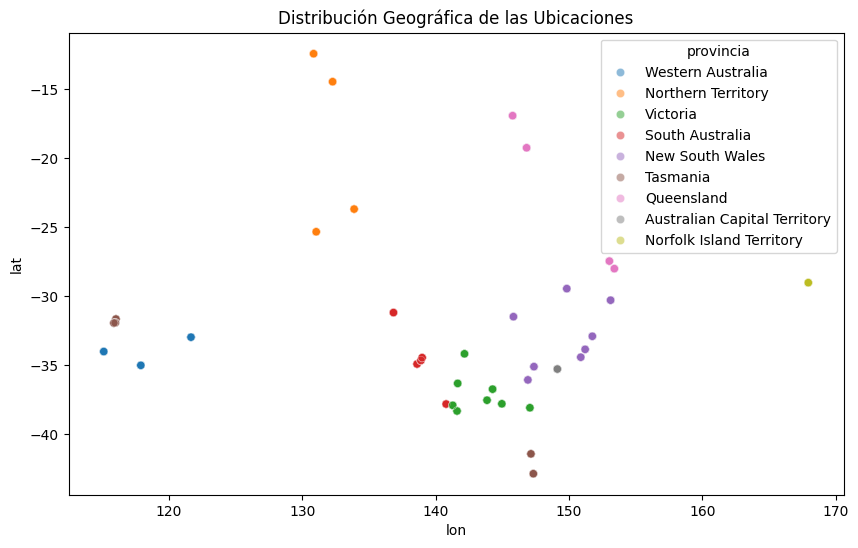

In [100]:
# Scatterplot lat y log
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_imputado, x='lon', y='lat', hue='provincia', alpha=0.5)
plt.title('Distribución Geográfica de las Ubicaciones')

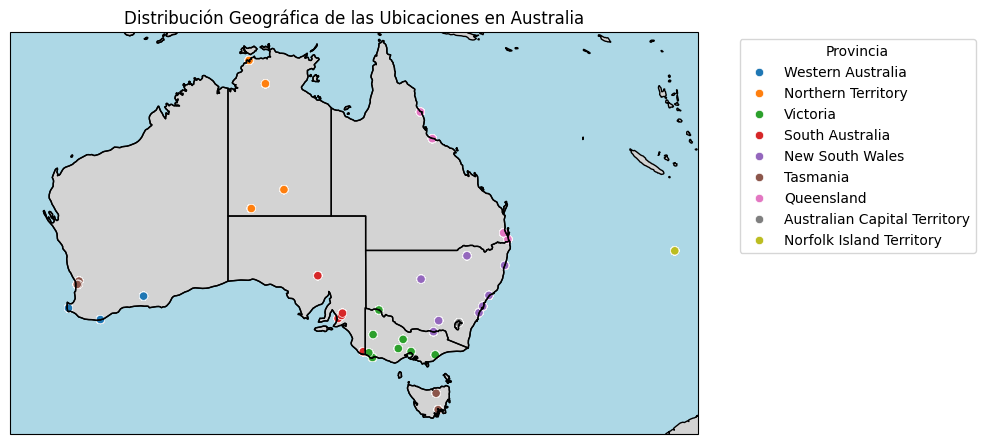

In [101]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear la figura con proyección cartográfica
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Añadir el mapa de fondo de Australia
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Continentes
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Océanos
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Líneas costeras
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')  # Fronteras
ax.add_feature(cfeature.STATES, edgecolor='black')  # Divisiones estatales (provincias)

# Establecer el límite del mapa para centrarse en Australia
ax.set_extent([110, 170, -45, -10], crs=ccrs.PlateCarree())

# Scatter plot con seaborn
sns.scatterplot(data=X_train_imputado, x='lon', y='lat', hue='provincia', alpha=1, ax=ax, transform=ccrs.PlateCarree())

# Añadir título y leyenda
plt.title('Distribución Geográfica de las Ubicaciones en Australia')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar recortes
plt.tight_layout()
plt.show()

# Graficos

In [102]:
X_train_imputado["Date"] = pd.to_datetime(X_train_imputado["Date"], format="%Y-%m-%d")
X_train_imputado["year"] = X_train_imputado["Date"].dt.year
X_train_imputado["month"] = X_train_imputado["Date"].dt.month
X_train_imputado["day"] = X_train_imputado["Date"].dt.day
X_test_imputado["Date"] = pd.to_datetime(X_test_imputado["Date"], format="%Y-%m-%d")
X_test_imputado["year"] = X_test_imputado["Date"].dt.year
X_test_imputado["month"] = X_test_imputado["Date"].dt.month
X_test_imputado["day"] = X_test_imputado["Date"].dt.day

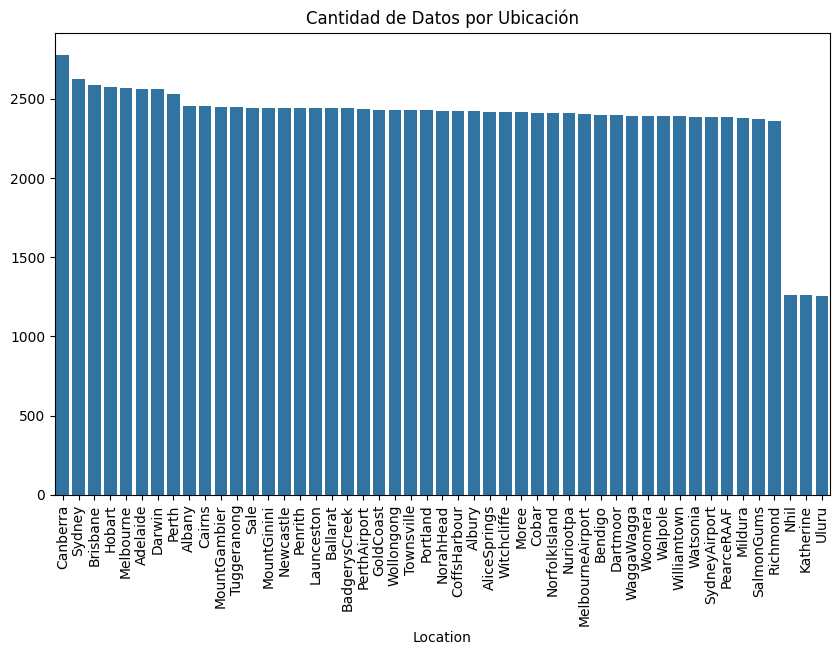

In [103]:
location_counts = X_train_imputado['Location'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Cantidad de Datos por Ubicación')
plt.xticks(rotation=90)
plt.show()

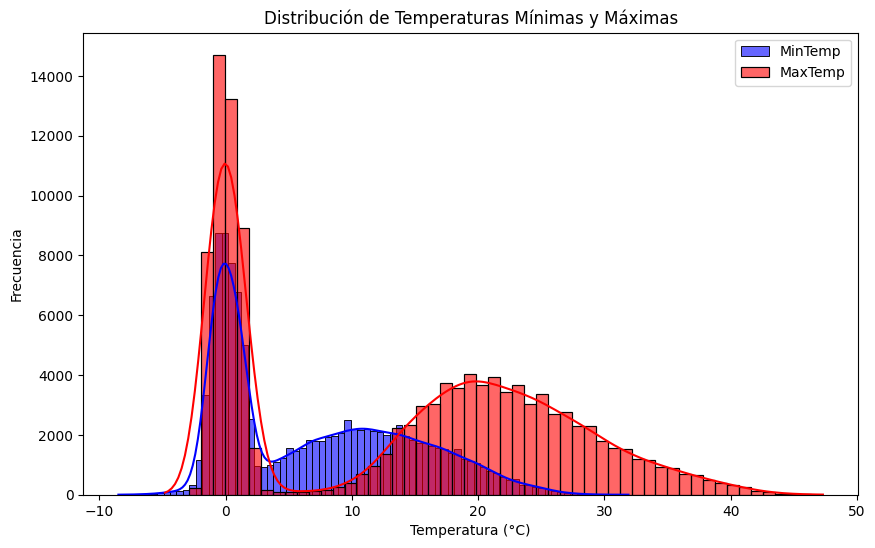

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train_imputado, x="MinTemp", color="blue", label="MinTemp", kde=True, alpha=0.6)
sns.histplot(data=X_train_imputado, x="MaxTemp", color="red", label="MaxTemp", kde=True, alpha=0.6)
plt.legend()
plt.title("Distribución de Temperaturas Mínimas y Máximas")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

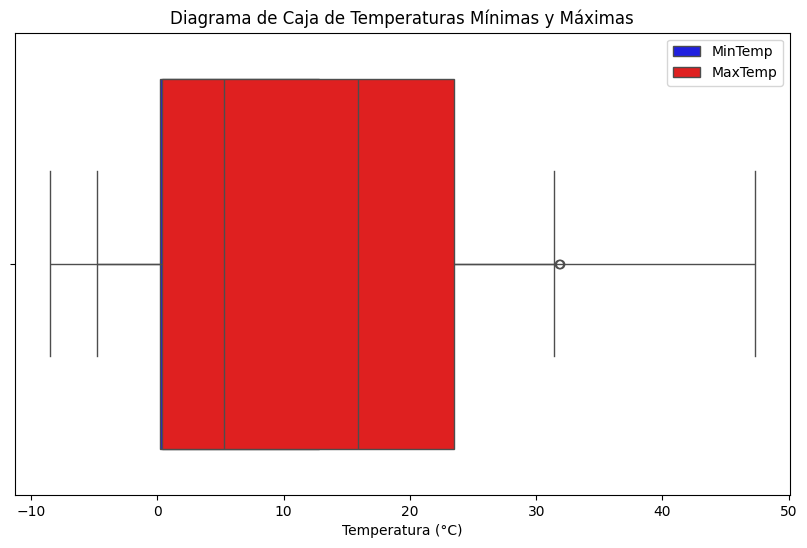

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_imputado, x="MinTemp", color="blue", label="MinTemp")
sns.boxplot(data=X_train_imputado, x="MaxTemp", color="red", label="MaxTemp")
plt.title("Diagrama de Caja de Temperaturas Mínimas y Máximas")
plt.xlabel("Temperatura (°C)")
plt.show()

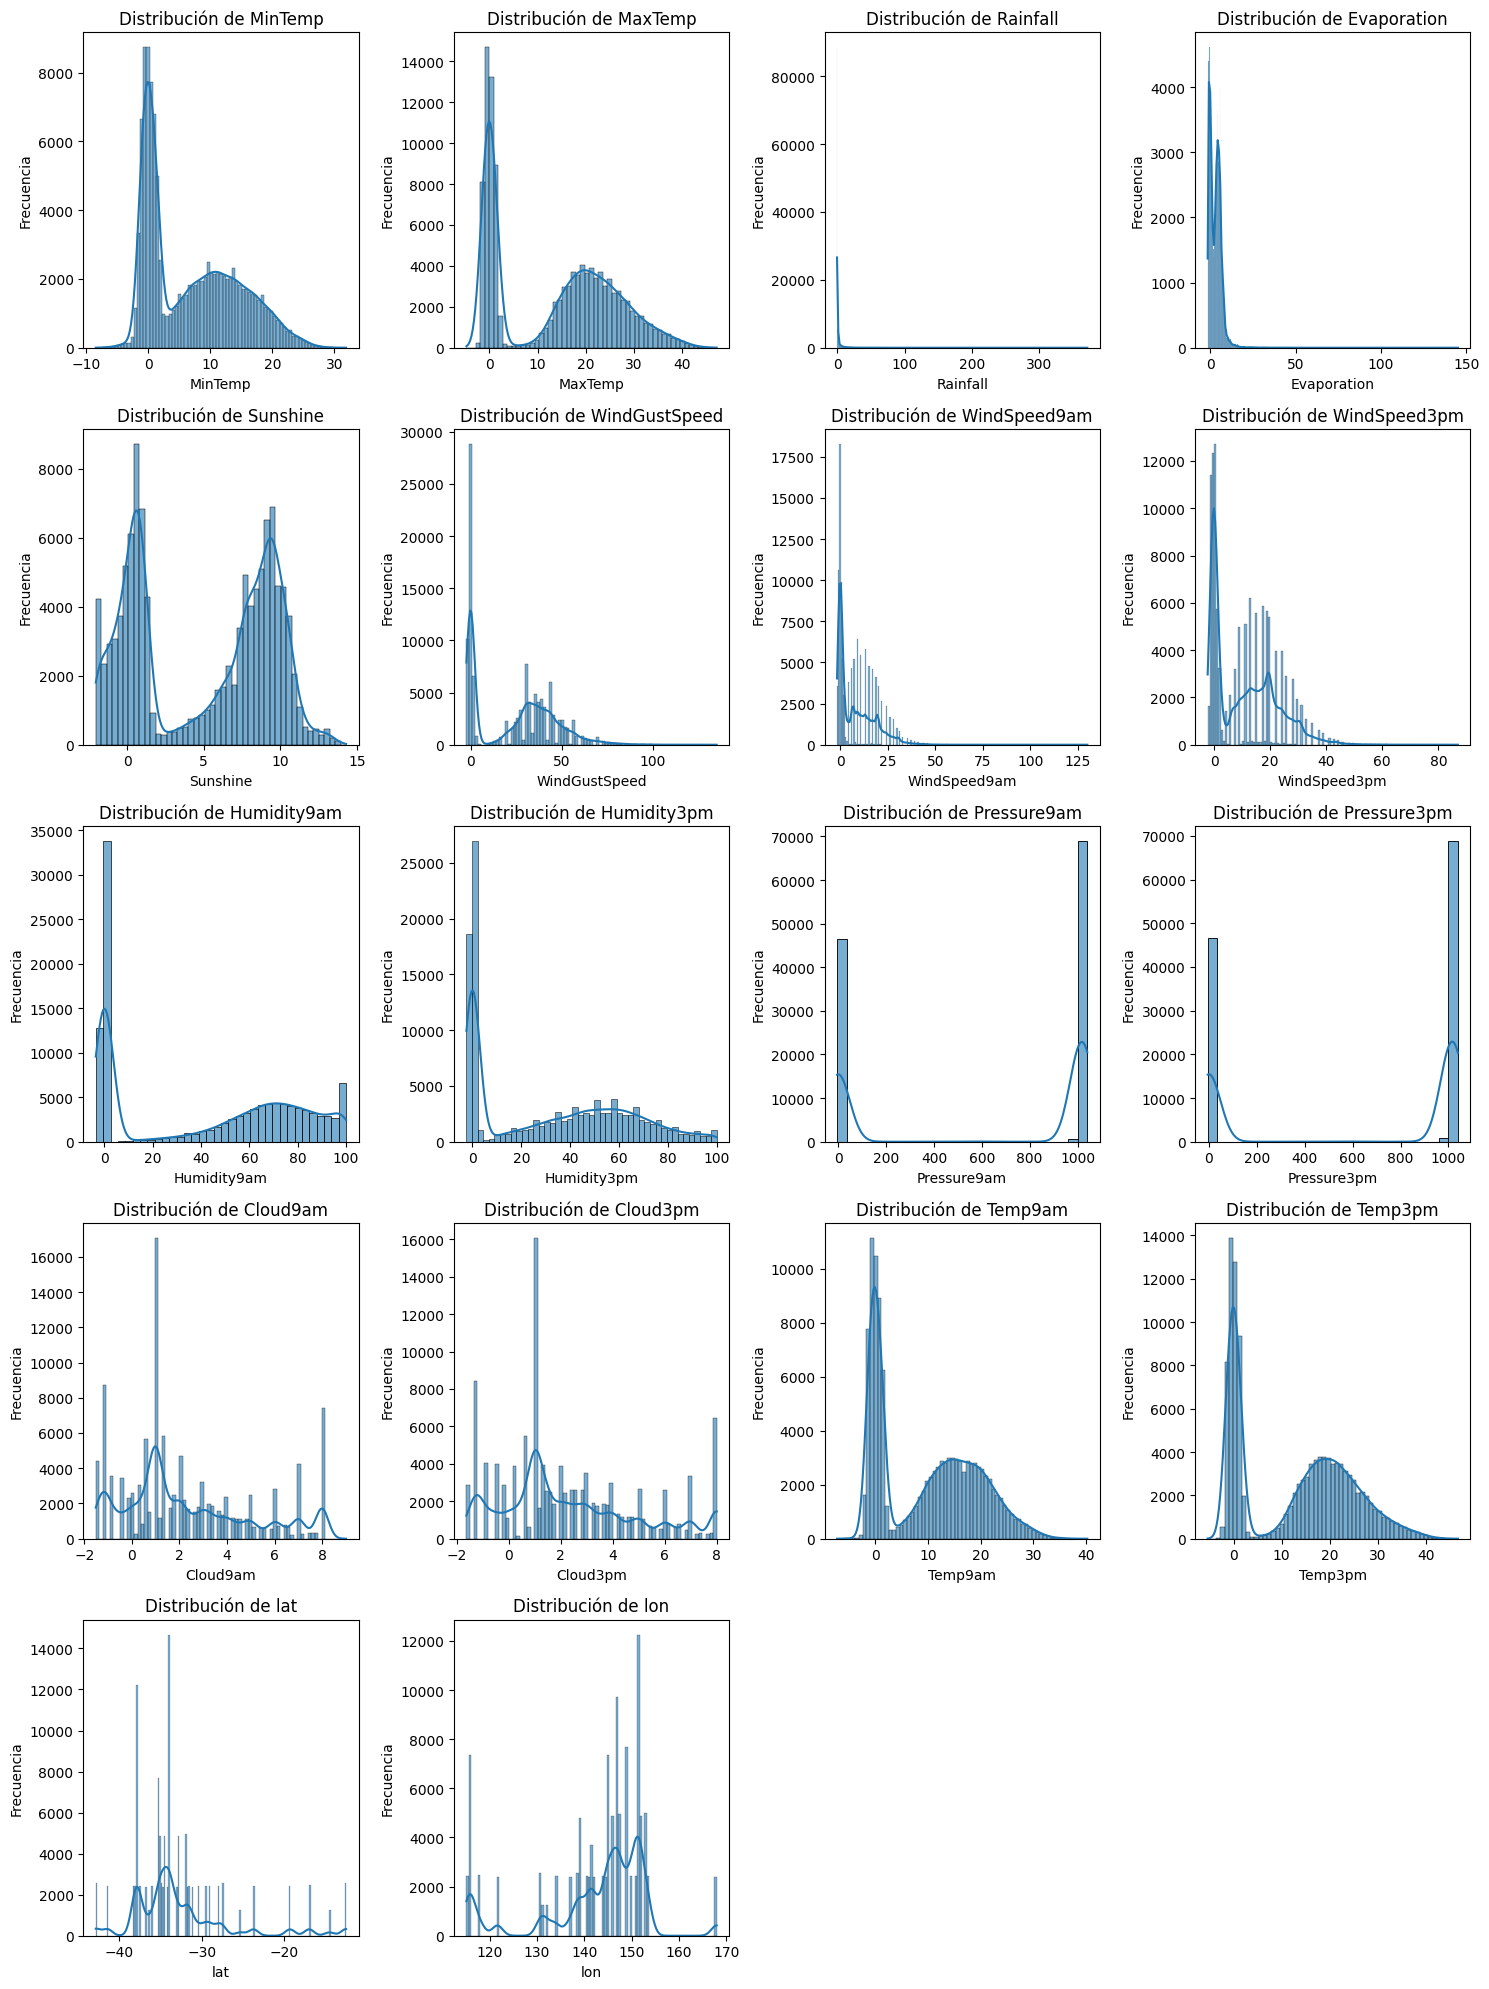

In [106]:
# Gráficos de distribución para todas las columnas numéricas

numeric_cols = X_train_imputado.select_dtypes(include=['float64']).columns

n_cols = 4 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 
plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X_train_imputado, x=column, kde=True, alpha=0.6)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

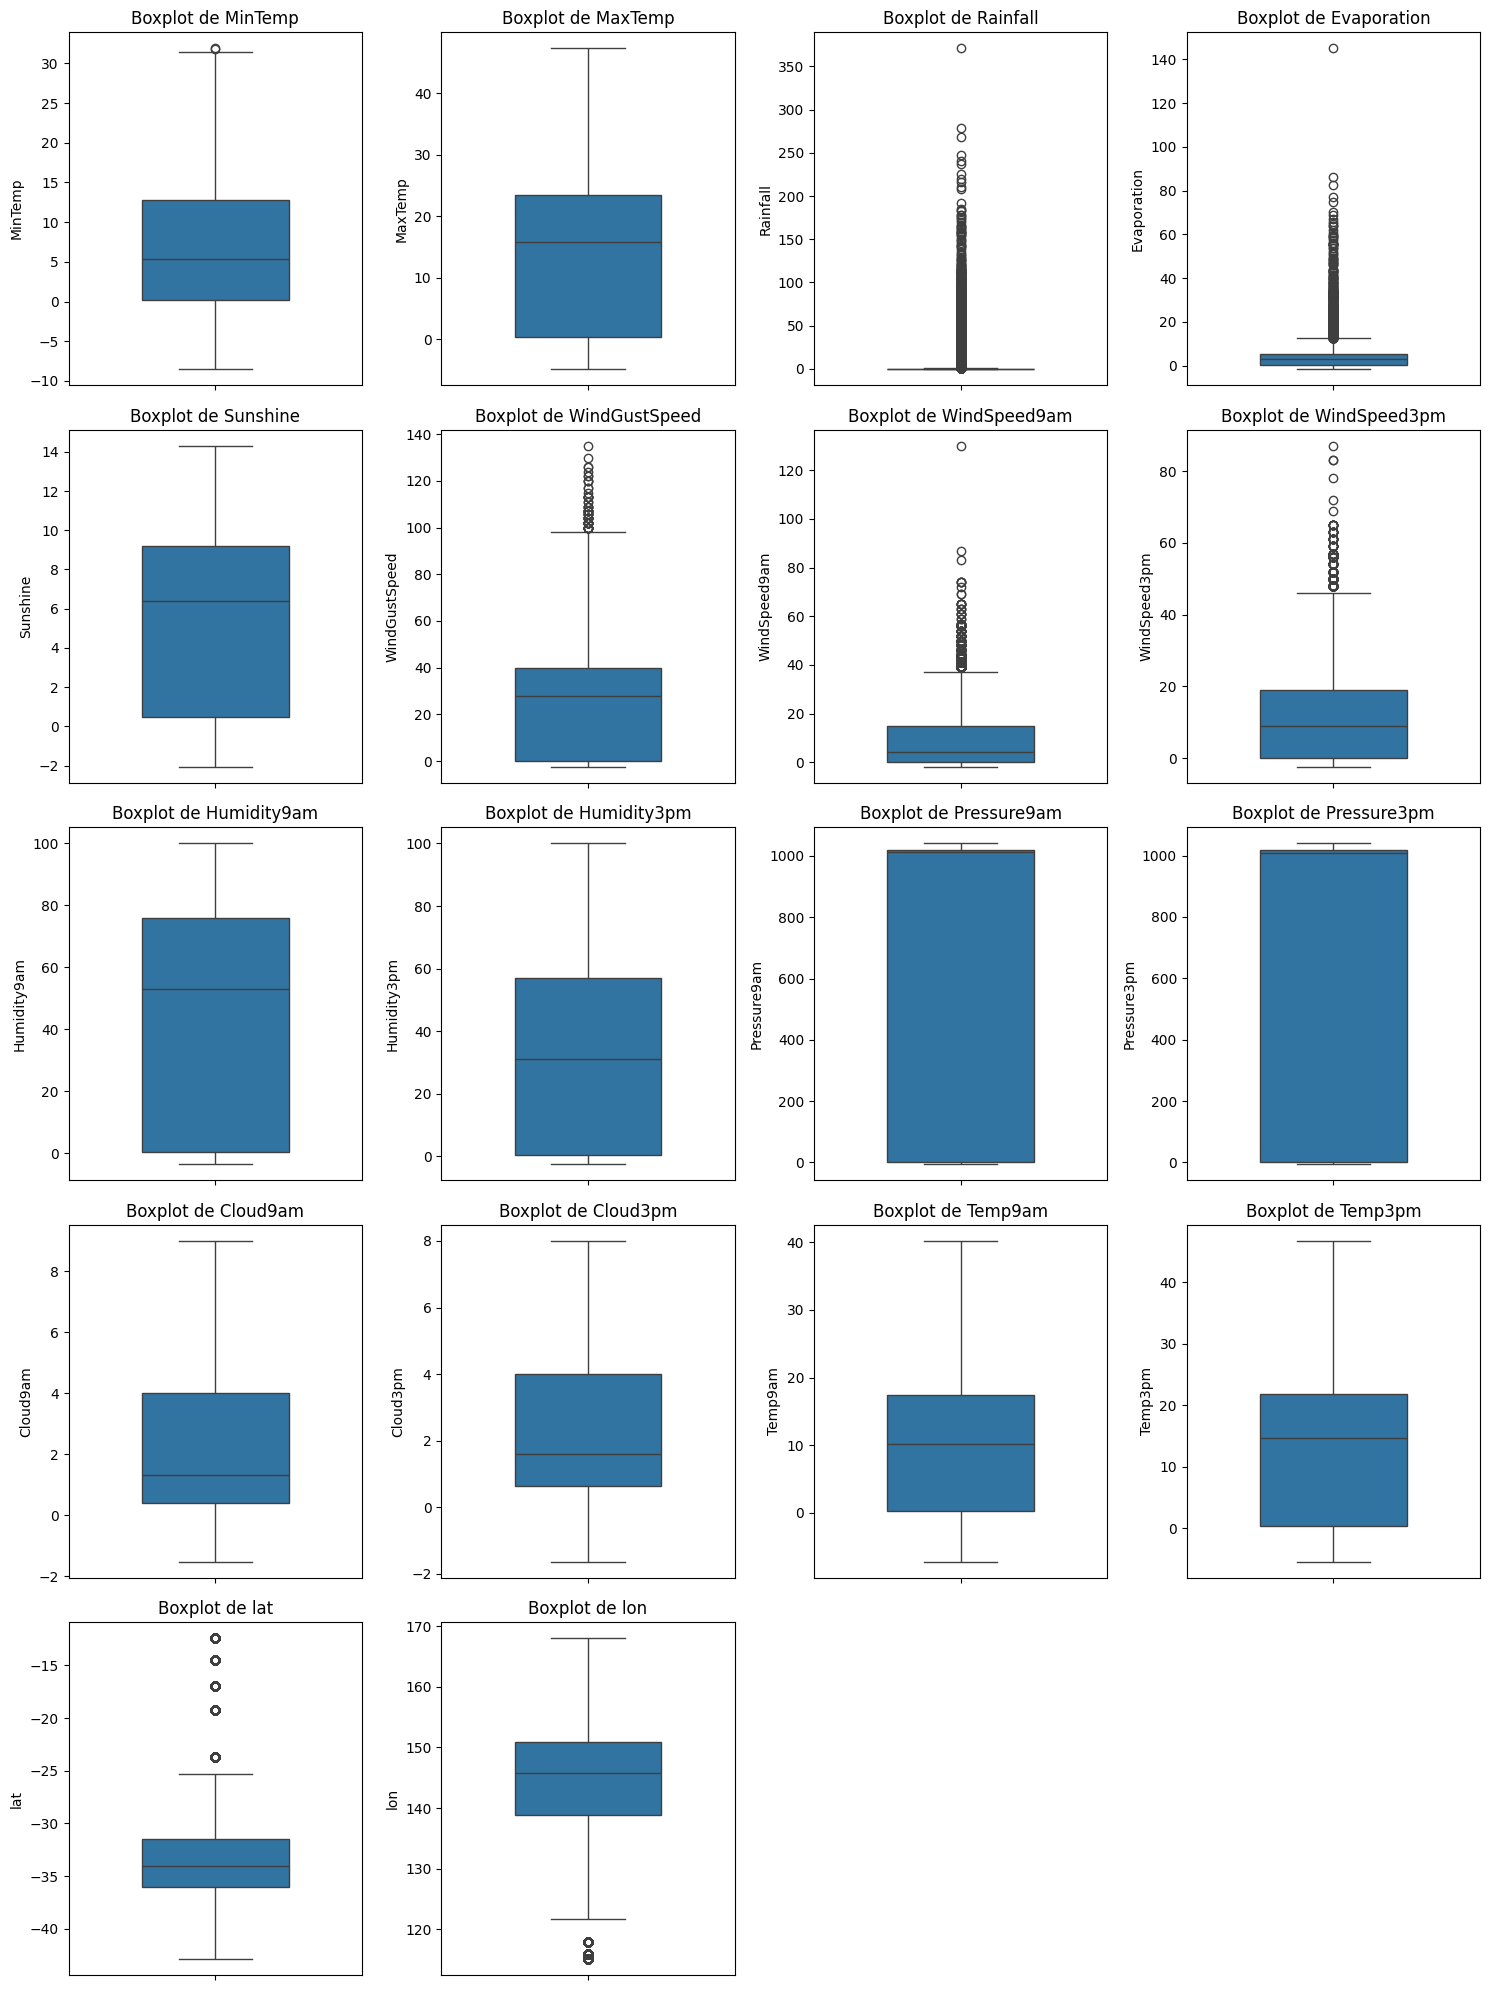

In [107]:
# Gráficos de boxplot para las columnas numéricas

numeric_cols = X_train_imputado.select_dtypes(include=['float64']).columns

n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, n_rows * 4)) 

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=X_train_imputado, y=column, width=0.5)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='RainTomorrow'>

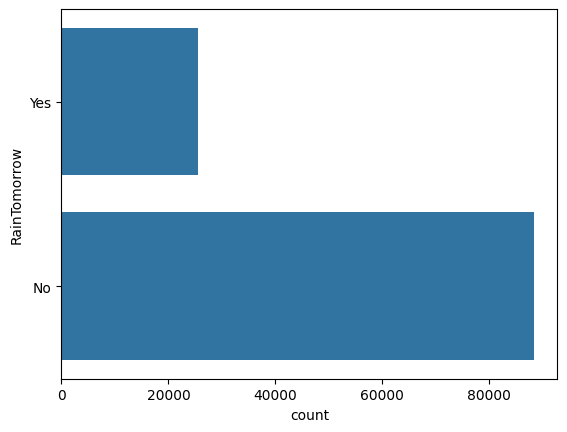

In [108]:
# variable objetivo
sns.countplot(y_train)

La variable objetivo esta bastante desbalanceada

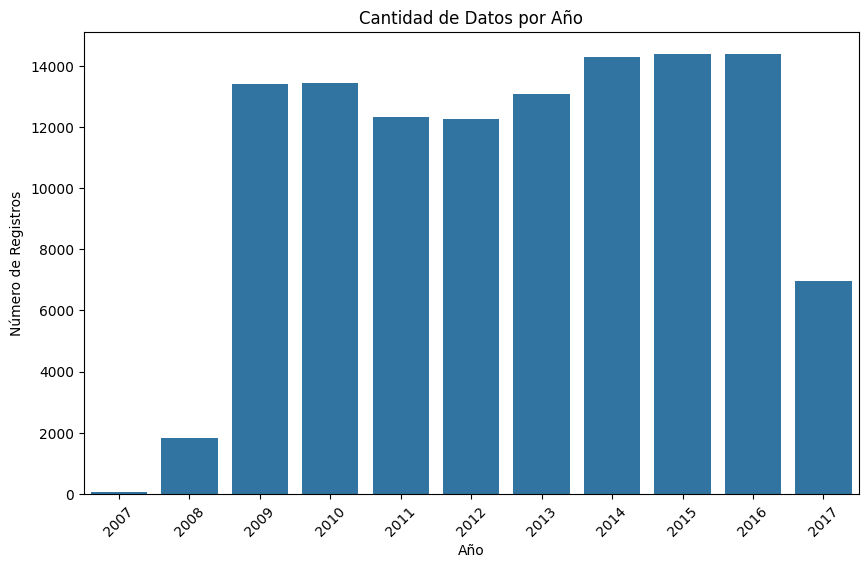

In [109]:
# Graficar Date
year_counts = X_train_imputado['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Cantidad de Datos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.show()

# Tratamiento variables categoricas

In [120]:
# Covertir variables objeto a categoricas
cols_categoricas = X_train_imputado.select_dtypes(include=['object']).columns
for col in cols_categoricas:
    X_train_imputado[col] = X_train_imputado[col].astype('category')
    X_test_imputado[col] = X_test_imputado[col].astype('category')
X_train_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116368 entries, 111548 to 121958
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           116368 non-null  datetime64[ns]
 1   Location       116368 non-null  category      
 2   MinTemp        116368 non-null  float64       
 3   MaxTemp        116368 non-null  float64       
 4   Rainfall       116368 non-null  float64       
 5   Evaporation    116368 non-null  float64       
 6   Sunshine       116368 non-null  float64       
 7   WindGustDir    108118 non-null  category      
 8   WindGustSpeed  116368 non-null  float64       
 9   WindDir9am     107939 non-null  category      
 10  WindDir3pm     112971 non-null  category      
 11  WindSpeed9am   116368 non-null  float64       
 12  WindSpeed3pm   116368 non-null  float64       
 13  Humidity9am    116368 non-null  float64       
 14  Humidity3pm    116368 non-null  float64       
 15  

In [121]:
# Convertir Date a datetime
X_train_imputado["Date"] = pd.to_datetime(X_train_imputado["Date"], format="%Y-%m-%d")
X_test_imputado["Date"] = pd.to_datetime(X_test_imputado["Date"], format="%Y-%m-%d")

In [122]:
# Opcion 1
# Aplicando One-Hot Encoding a Location, WindGustDir, WindDir9am, WindDir3pm, rainToday
columnas_one_hot = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
X_train_encoded = pd.get_dummies(X_train_imputado, columns=columnas_one_hot, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_imputado, columns=columnas_one_hot, drop_first=True)
X_train_encoded.shape, X_test_encoded.shape

((116368, 117), (29092, 117))

In [123]:
# Opcion 2
# Aplicar label Encoding a Location, WindGustDir, WindDir9am, WindDir3pm, rainToday
columnas_label = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in columnas_label:
    le = LabelEncoder()
    X_train_imputado[col] = le.fit_transform(X_train_imputado[col])
    X_test_imputado[col] = le.transform(X_test_imputado[col])
    label_encoders[col] = le.fit

In [124]:
X_train_imputado.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,provincia,lat,lon,year,month,day
111548,2017-04-24,1,14.50000,17.80000,14.20000,6.800000,1.1600,16,41.400000,16,16,0.000000,17.800000,94.000000,71.000000,1024.100000,1022.500000,8.000000,6.400000,16.200000,17.420000,1,Western Australia,-35.0228,117.8814,2017,4,24
142528,2013-10-11,16,24.60000,39.50000,0.00000,12.000000,10.9400,9,31.000000,3,7,9.000000,17.000000,52.000000,21.000000,1011.800000,1006.600000,2.000000,4.000000,30.100000,39.200000,0,Northern Territory,-14.4667,132.2667,2013,10,11
65304,2012-02-18,19,0.20872,0.35387,-0.27644,-0.610795,0.0815,10,-0.789493,12,8,-0.960669,-1.004137,1.115255,0.359079,0.128557,0.079131,0.979482,-0.500668,-0.119715,0.273176,0,Victoria,-37.8136,144.9631,2012,2,18
40651,2012-02-18,45,18.30000,26.60000,0.00000,4.000000,7.8200,9,28.000000,15,10,11.000000,22.000000,79.000000,67.000000,1017.000000,1016.500000,6.000000,5.600000,23.000000,25.400000,0,South Australia,-34.6721,138.8884,2012,2,18
97487,2011-10-11,0,11.40000,19.30000,0.60000,2.400000,8.9000,13,31.000000,12,11,13.000000,19.000000,63.000000,47.000000,1018.600000,1017.100000,4.400000,3.000000,14.400000,18.300000,0,South Australia,-34.9289,138.6011,2011,10,11


## Correlaciones

In [125]:
# Transformar y_train a categorica
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

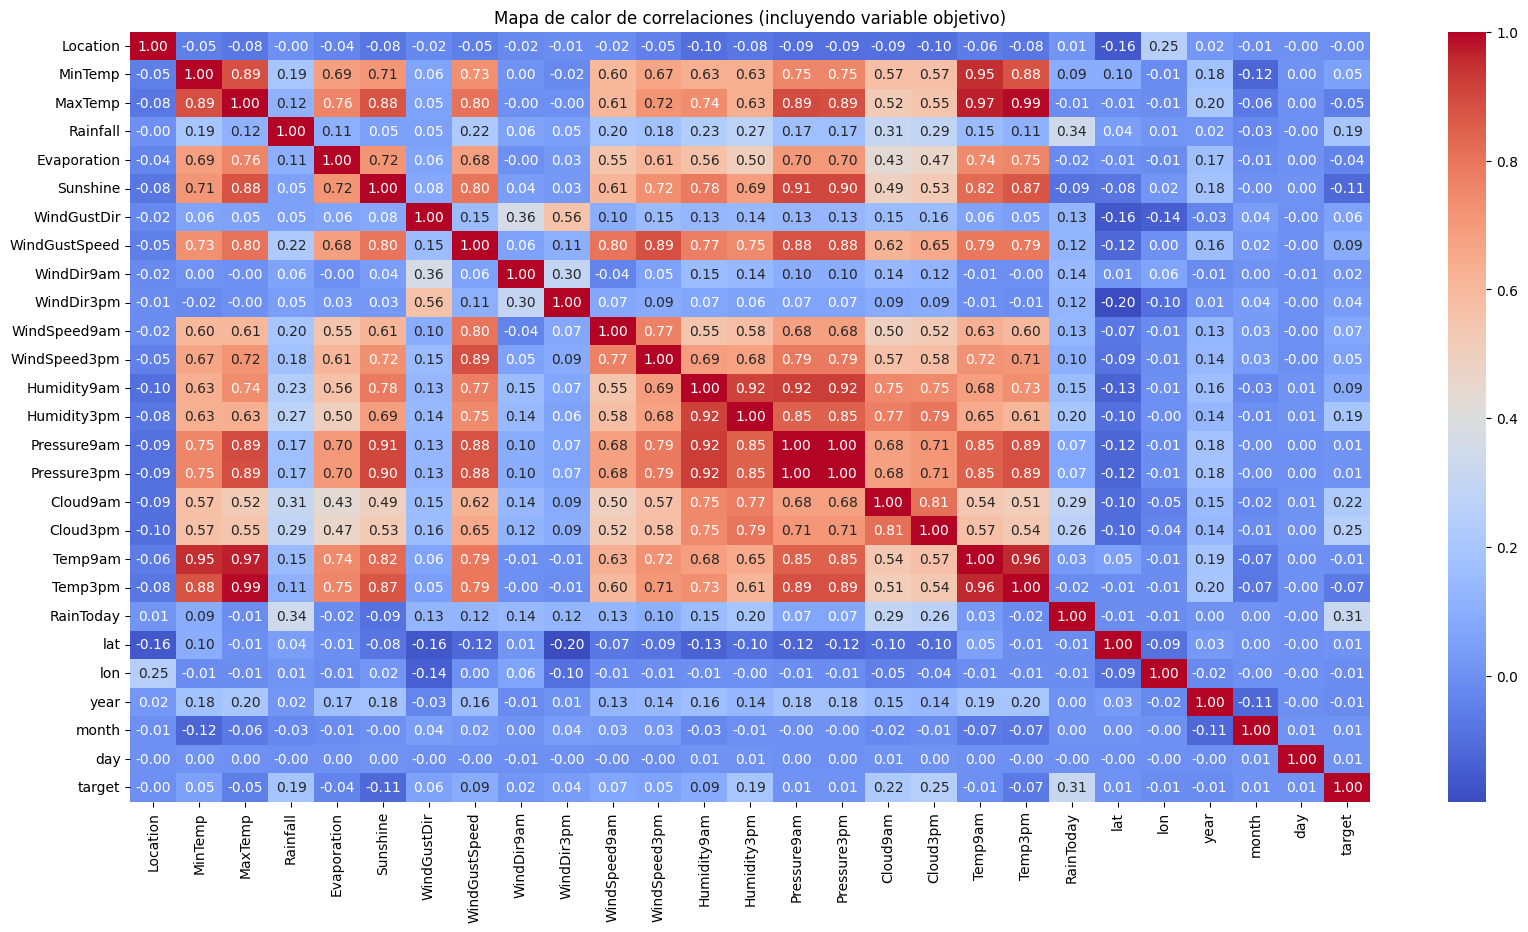

In [126]:
# Mapa de correlaciones incluyendo variable objetivo

data_combined = X_train_imputado.copy()
data_combined['target'] = y_train

data_combined_numeric = data_combined.select_dtypes(include=['float64', 'int64', "int32"])  # int32 son los datos de year, mouth y day

corr = data_combined_numeric.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones (incluyendo variable objetivo)")
plt.show()

Correlacion media entre la target y humidity3pm, cloud9am, cloud3pm, y correlacion negativa media con sunshine

# Escalar

In [127]:
# Crear otro df con solo valores numericos
X_train_escalado = X_train_imputado.select_dtypes(include=['float64', 'int64', "int32"])  # int32 son los datos de year, mouth y day
X_test_escalado = X_test_imputado.select_dtypes(include=['float64', 'int64', "int32"])  # int32 son los datos de year, mouth y day

In [128]:
# Escalar X_train_escalado y X_test_escalado
scaler = StandardScaler()
X_train_escalado = pd.DataFrame(scaler.fit_transform(X_train_escalado), columns=X_train_escalado.columns, index=X_train_escalado.index)
X_test_escalado = pd.DataFrame(scaler.transform(X_test_escalado), columns=X_test_escalado.columns, index=X_test_escalado.index)

# Regresion Logistica

In [131]:
# Falta tratar las columnas lat y log, tienen nulos
# Dropear las columnas lat y log
X_train_escalado = X_train_escalado.drop(columns=['lat', 'lon'])
X_test_escalado = X_test_escalado.drop(columns=['lat', 'lon'])

In [137]:
y_train.isna().sum()

np.int64(2607)

In [144]:
y_train.dropna(inplace=True)
# Eliminar en X_train_escalado las filas correspondientes a y_train que fueron eliminadas
X_train_escalado = X_train_escalado.loc[y_train.index]
# En y_test
y_test.dropna(inplace=True)
X_test_escalado = X_test_escalado.loc[y_test.index]

In [145]:
model = LogisticRegression(random_state=42)

model.fit(X_train_escalado, y_train)

y_pred = model.predict(X_test_escalado)

In [147]:
# Calcular métricas
accuracy_logreg = accuracy_score(y_test, y_pred)

classification_report_logreg = classification_report(y_test, y_pred)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Exactitud: {accuracy_logreg}')
print("Reporte de clasificación:")
print(classification_report_logreg)

Métricas para logreg:
Exactitud: 0.8106359032076533
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89     22012
         1.0       0.67      0.32      0.43      6420

    accuracy                           0.81     28432
   macro avg       0.75      0.64      0.66     28432
weighted avg       0.79      0.81      0.78     28432



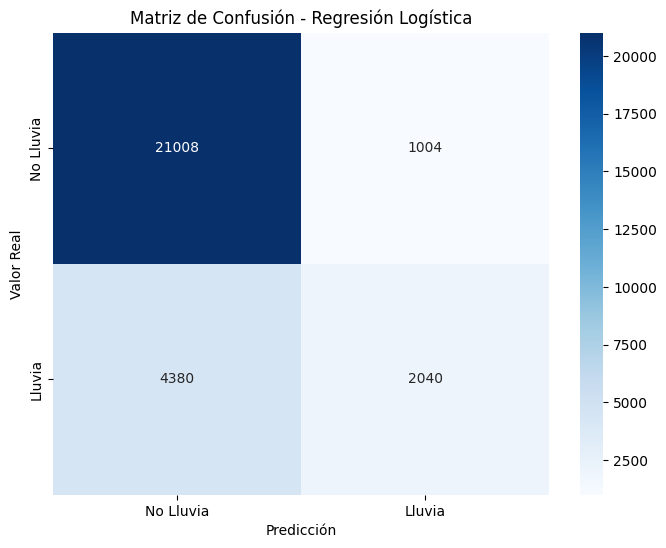

In [149]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Lluvia', 'Lluvia'],
            yticklabels=['No Lluvia', 'Lluvia'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()